## [Problem Statement](https://github.com/michevan/WIDS-Google/blob/main/slides/%5BWiDS%20Datathon%5D%20Data%20Science%20Code%20Walkthrough.pdf)
Refer to the presentation for details about the problem statement

In [ ]:
#@title Upload your Kaggle credentials
#@markdown You can generate them in your Kaggle user profile

# from google.colab import files
# files.upload()

In [ ]:
#@title Download the Housing Prediction dataset
#@markdown There are two csv files - train & test which will be needed for this analysis. You can upload them to Google Drive from where we can read the files in the colab notebook.


In [ ]:
# Load the necessary python modules

# Essentials
import numpy as np
import pandas as pd

# Plotting             
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams["figure.figsize"] = (10, 5)

# **Load the data**

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


# Loading Files and exploring the data:
We will start by loading both train and test data and performing some simple analysis to understand the data more. Here are some things we can check:


1.   Data types
2.   Shape of data
3.   Data Distributions
4.   Correlations




In [ ]:
# Load from Google Drive

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Others/WiDS_2022/house-prices-advanced-regression-techniques/housing_train_data.csv'
housing_train_data = pd.read_csv(path)

path = '/content/drive/MyDrive/Others/WiDS_2022/house-prices-advanced-regression-techniques/housing_test_data.csv'
housing_test_data = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
housing_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Note that we have used this step only to check if data has been uploaded in the right format. Avoid looking into the test data as this will be used for predictions only.
housing_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Data Exploration**

In [ ]:
print("Number of train samples are", housing_train_data.shape)
print("Number of test samples are", housing_test_data.shape)

Number of train samples are (1460, 81)
Number of test samples are (1459, 80)


In [ ]:
# Looking at the columns in the dataset
housing_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# looking at the num of rows and columns in the data
housing_train_data.shape

(1460, 81)

In [ ]:
# checking dtypes
housing_train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# describing the data
housing_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# descriving a particular column
housing_train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


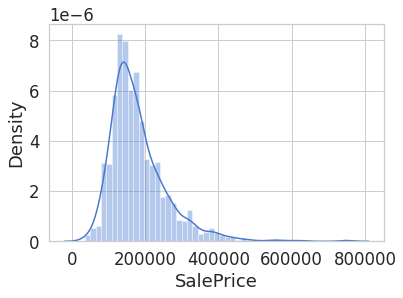

In [ ]:
sns.distplot(housing_train_data['SalePrice']);

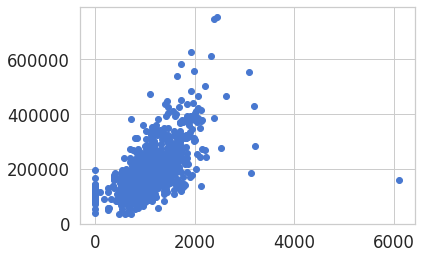

In [ ]:
plt.scatter(x = housing_train_data['TotalBsmtSF'], y = housing_train_data['SalePrice'])

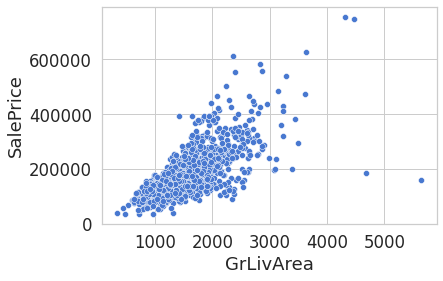

In [ ]:
sns.scatterplot(data=housing_train_data, x='GrLivArea', y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


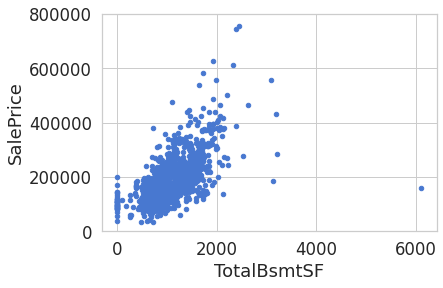

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([housing_train_data['SalePrice'], housing_train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

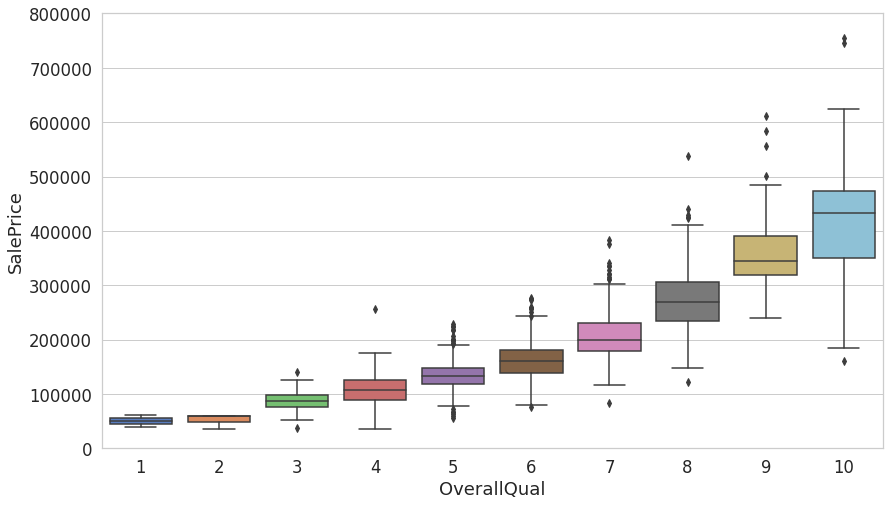

In [ ]:
var = 'OverallQual'
data = pd.concat([housing_train_data['SalePrice'], housing_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


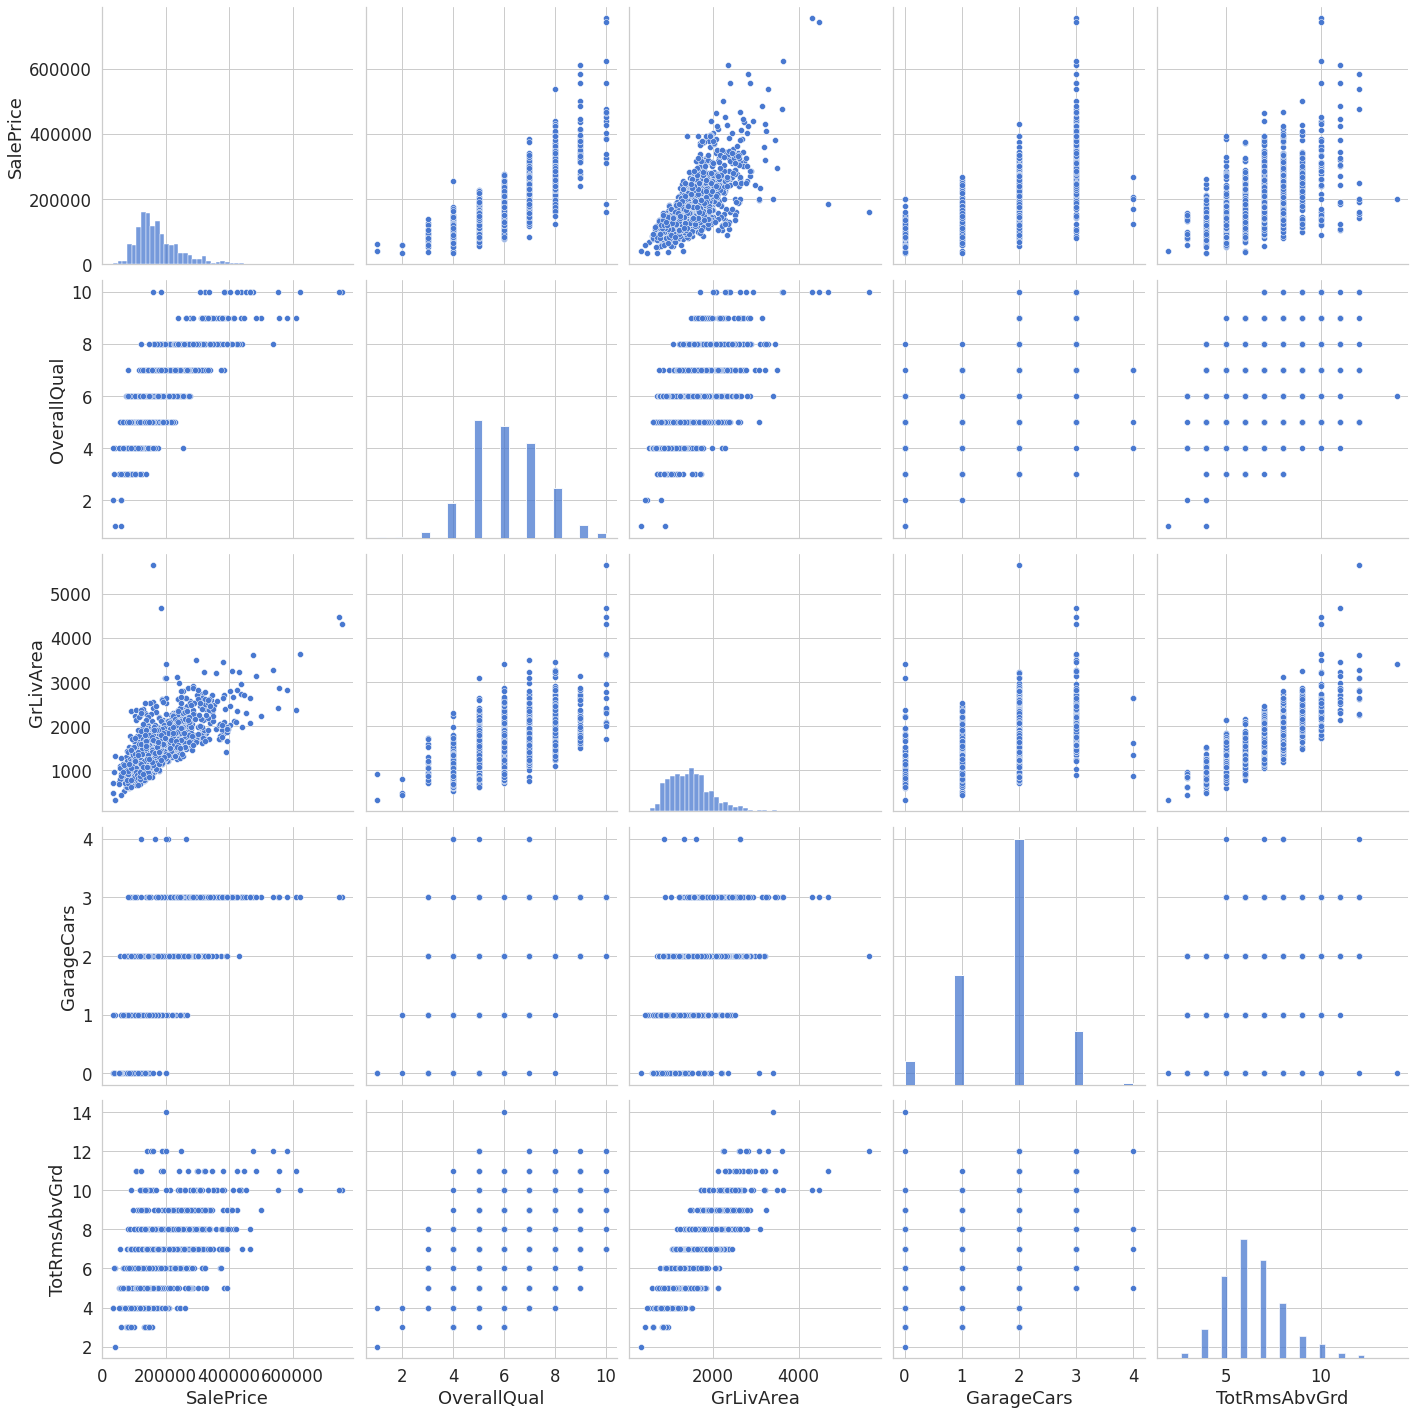

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd']
sns.pairplot(housing_train_data[cols], size = 4);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


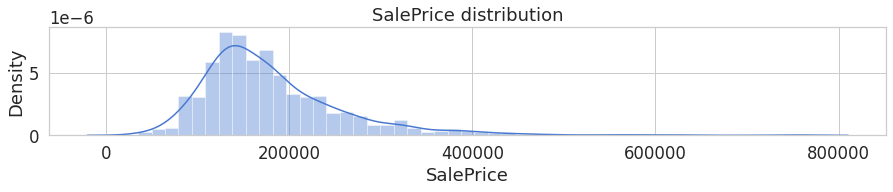

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


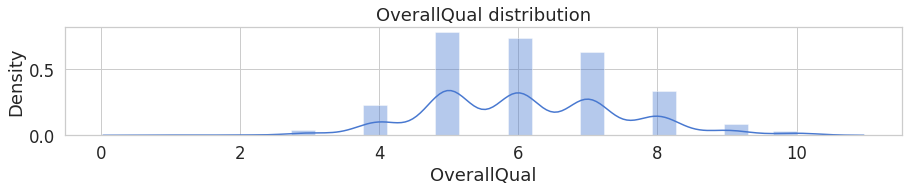

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


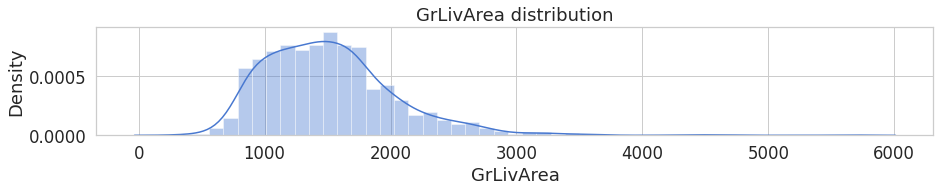

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


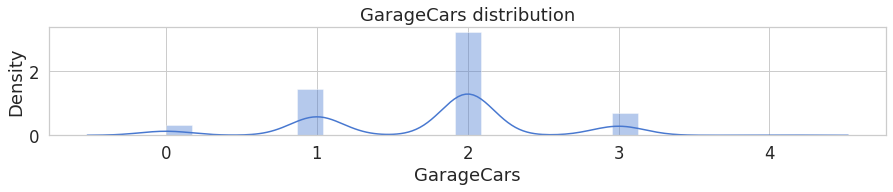

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


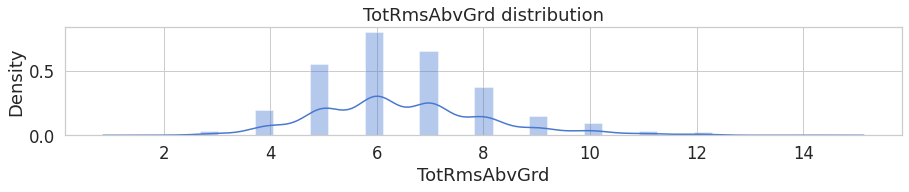

In [ ]:
for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(housing_train_data[col],kde=True)
    plt.title(col+" distribution")
    #i=i+1
    plt.show()

# Correlation Analysis

So far we conducted univariate analysis. Now let's look at bivariate analysis to understand how variables are related with each other.

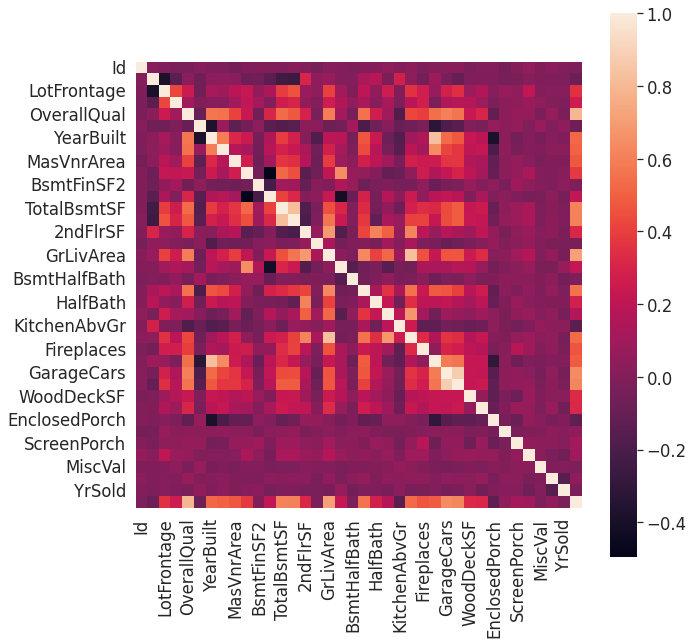

In [ ]:
corrmat = housing_train_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, square=True);

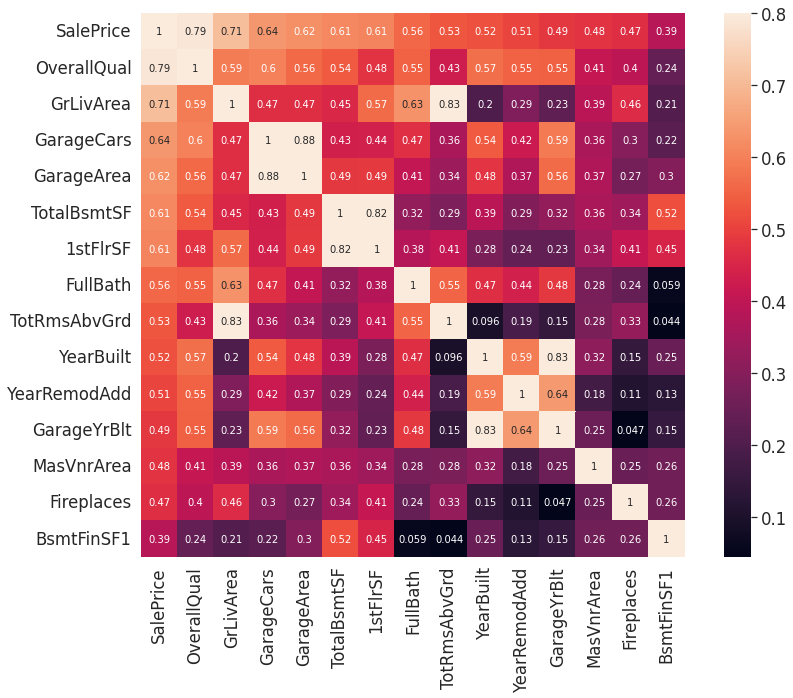

In [ ]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(housing_train_data[cols].corr(), vmax=.8, square=True, annot = True);

We observe high correlations between some variables. We can drop the variables which have high correlations with other variables.

In [ ]:
# Dropping columns with high correlation values
housing_train_data = housing_train_data.drop(columns = ['GarageCars', 'GrLivArea', 'GarageYrBlt'])
housing_test_data = housing_test_data.drop(columns = ['GarageCars', 'GrLivArea', 'GarageYrBlt'])

# **Feature Engineering**

In the previous section, we have only understood the data as is, but not made any changes to the data. In this section, we will explore how we can handle missing values. We have multiple ways to handle missing values. For this case, we will use a Simple Imputer.

For numeric variables, we will use a simple imputer using median. For categorical, we will use the most-frequent value to substitute for the missing values.

In [ ]:
# columns wit missing values
cols_with_missing = [col for col in housing_train_data.columns 
                                 if housing_train_data[col].isnull().any()]
miss_count = housing_train_data.isna().sum()
miss_df = (pd.concat(
                     [miss_count.rename('Missing count'),
                     miss_count.div(len(housing_train_data)).rename('Missing value')],
                     axis = 1
                     ).loc[miss_count.ne(0)]
           )
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


Note that a few of these variables have a lot of missing values. We wil drop these columns and use the imputer for columns where only a small part of the values are missing.

In [ ]:
# Dropping variables with > 40% missing
housing_train_data = housing_train_data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'])
housing_test_data = housing_test_data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'])

In [ ]:
# Use simple imputer for numerical columns
from sklearn.impute import SimpleImputer
null_cols=['LotFrontage', 'MasVnrArea']
imp = SimpleImputer(missing_values=np.nan, strategy='median')

housing_train_data[null_cols]  = imp.fit_transform(housing_train_data[null_cols])
housing_test_data[null_cols]  = imp.transform(housing_test_data[null_cols])
housing_test_data = housing_test_data.fillna(0)

In [ ]:
# Use simple imputer for categorical columns
from sklearn.impute import SimpleImputer
null_cols=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

housing_train_data[null_cols]  = imp.fit_transform(housing_train_data[null_cols])
housing_test_data[null_cols]  = imp.transform(housing_test_data[null_cols])
housing_test_data = housing_test_data.fillna(0)

In [ ]:
# rechecking columns wit missing values after imputation
cols_with_missing = [col for col in housing_train_data.columns 
                                 if housing_train_data[col].isnull().any()]
miss_count = housing_train_data.isna().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(housing_train_data)).rename('Missing value')],axis = 1).loc[miss_count.ne(0)])
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value


All missing values have been substituted! Now let's prepare the data for modeling.

In [ ]:
# Dropping the Id column as it is the identifier
housing_train_data = housing_train_data.drop(columns = 'Id')
housing_test_data = housing_test_data.drop(columns = 'Id')

# segregating categorical and numeric columns. These will be used to encode and scale respectively.
categorical_cols=[c for c in housing_train_data.columns if (1<housing_train_data[c].nunique()) & (housing_train_data[c].dtype != np.number)& (housing_train_data[c].dtype != int) & (housing_train_data[c].dtype != 'float64')]
numerical_cols = housing_train_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('SalePrice')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
# Separating the features from the label
y = housing_train_data['SalePrice']
X = housing_train_data.drop(columns = 'SalePrice')

In [ ]:
# Scale numerical features of train and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(housing_train_data[numerical_cols])
X_scaled = pd.DataFrame(scaled_columns, columns = numerical_cols)

# Performing the same operation on test data
scaled_columns  = scaler.transform(housing_test_data[numerical_cols])
housing_test_data_scaled = pd.DataFrame(scaled_columns, columns = numerical_cols)

In [ ]:
# Combine scaled columns with original data
housing_train_features = pd.concat([X_scaled, housing_train_data.drop(numerical_cols, axis = 1)], axis = 1)
housing_train_features = housing_train_features.drop(columns = 'SalePrice')

# Performing the same operation on test data. We do not need to drop the label from the test data because it doesn't have any label!
housing_test_features = pd.concat([housing_test_data_scaled, housing_test_data.drop(numerical_cols, axis = 1)], axis = 1)

In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    housing_train_features[col] = le.fit_transform(housing_train_features[col].astype(str))
    housing_test_features[col] = le.fit_transform(housing_test_features[col].astype(str))

In [ ]:
# Checking the final data before running the model
housing_train_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


# **Model Building - Baseline model**

Keep it simple! We always want to start by building a baseline model first before moving to advanced models. Simpler models are also easy to interpret.

There are a few steps we need to perform:
1. Split training and test. Usually, we keep a smaller portion of the data aside for test set. In this case, we have kept 30% data as test (validation data) and we will be training the data on 70% of the data.

2. Choose the best model from the models we build. This best model will be used to generalize the model performance on test dataset. The 30% data we set aside will be used to compare different models and perform any hyperparameter tuning before generalization.

In [ ]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_train_features, y, test_size = 0.3, random_state = 00)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1022, 71)
Shape of X_test:  (438, 71)
Shape of y_train:  (1022,)
Shape of y_test (438,)


In [ ]:
# Fitting the regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Understanding regression scores on train and test data
# from sklearn.metrics import r2_score
# preds = reg.predict(X_train)
# print(r2_score(X_train, preds))
print('Regression score on train data is: ', round(reg.score(X_train, y_train),2))
print('Regression score on test data is: ', round(reg.score(X_test, y_test),2))

Regression score on train data is:  0.88
Regression score on test data is:  0.67


This is a good baseline model but there is scope to improve this further. We also want our train and test scores to be close to each other.

A low training score can mean an underfit model. And a high training score but low test score can mean an overfit model.

In [ ]:
# Using the regression model to predict the data
y_pred_train = round(pd.Series(reg.predict(X_train)))

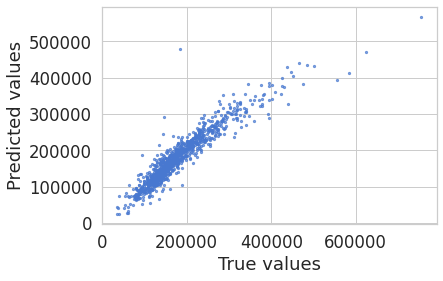

In [ ]:
plt.scatter(y_train, y_pred_train, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [ ]:
y_train.reset_index(drop=True, inplace=True)
out = pd.concat([y_train, y_pred_train], axis=1)
out.columns = ['SalePrice', 'SalePrice_pred']
out.head()

,SalePrice,SalePrice_pred
0,219500,247235.0
1,173000,170571.0
2,116500,107571.0
3,105000,113443.0
4,60000,28584.0


True and predicted values are similar. But this is the training data, we need to check the values on test data.

In [ ]:
# predicting on test (validation) data
y_pred_test = reg.predict(X_test)

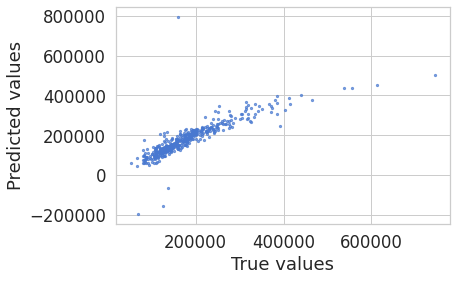

In [ ]:
# Understanding true and predicted values
plt.scatter(y_test, y_pred_test, s=5, alpha=0.7)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [ ]:
# Feature importance

from matplotlib import pyplot

# get importance
importance = reg.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -4835.86206
Feature: 1, Score: 309.59128
Feature: 2, Score: 5769.81907
Feature: 3, Score: 12070.73824
Feature: 4, Score: 6734.91720
Feature: 5, Score: 6450.36926
Feature: 6, Score: 710.10695
Feature: 7, Score: 5792.35459
Feature: 8, Score: -281070516213207840.00000
Feature: 9, Score: -99413025823622672.00000
Feature: 10, Score: -272300576818073088.00000
Feature: 11, Score: 270352221347748704.00000
Feature: 12, Score: 21292.77624
Feature: 13, Score: 22092.12729
Feature: 14, Score: 413.35482
Feature: 15, Score: 1211.77512
Feature: 16, Score: 294.52162
Feature: 17, Score: 2104.11435
Feature: 18, Score: 1682.89551
Feature: 19, Score: -2426.24106
Feature: 20, Score: -3797.36988
Feature: 21, Score: 4711.97961
Feature: 22, Score: 2904.88593
Feature: 23, Score: 4532.59439
Feature: 24, Score: 1377.39328
Feature: 25, Score: -404.92440
Feature: 26, Score: 338.99282
Feature: 27, Score: 903.91723
Feature: 28, Score: 1007.36042
Feature: 29, Score: 1398.62449
Feature: 30, Score: 11

Feature importance helps identify which features are most important in predicting the label. A high value of importance can mean it has a higher weight in predicting the label. Also note the sig of the importance. A positive sign can mean label increases with increase in the feature, and vice versa.

## **Model Building - Lasso & Gradient Boosting**

Now let's us build some more models to improve the performance of the model and compare them to baseline model

In [ ]:
# Building Lasso model
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Understanding regression scores on train and test data
print('Regression score on train data is: ', round(reg_lasso.score(X_train, y_train),2))
print('Regression score on test data is: ', round(reg_lasso.score(X_test, y_test),2))

Regression score on train data is:  0.88
Regression score on test data is:  0.68


In [ ]:
# Building a Gradient Boosted Regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
# Understanding regression scores on train and test data
print('Regression score on train data is: ', round(gb_reg.score(X_train, y_train),2))
print('Regression score on test data is: ', round(gb_reg.score(X_test, y_test),2))

Regression score on train data is:  0.97
Regression score on test data is:  0.84


This model seems to do much better than the other models. The train and test scores are both high, and they are also close to each other, so we will use this to generalize the model performance.

# **Generalizing on test data**

we will use the test data to generate predictions based on our best model.

In [ ]:
# Predicting on housing test data
gb_reg.predict(housing_test_features)

array([124090.30969289, 159134.7122684 , 169963.64342692, ...,
       169905.43462082, 120368.75523461, 225458.56256183])

We have successfully predicted the prices of houses in the test data based on models we trained on the training data. We also have insights on the features which are most important in determining the housing prices.

Best of luck for the WiDS 2022 Datathon!

In [ ]:
### End of code ###